<a href="https://colab.research.google.com/github/AhmedHesham34/Bike-sharing-demand/blob/main/Bike-sharing-demand5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [36]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

### Setup Kaggle API Key

In [37]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [38]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [39]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [40]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [81]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [43]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/train.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [45]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])],time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220722_172351/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220722_172351/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

### Review AutoGluon's training run with ranking of models that did the best.

In [46]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.822355      11.457187  444.548839                0.000832           0.309355            3       True         15
1   RandomForestMSE_BAG_L2  -53.315451      10.578392  412.254179                0.628980          29.901318            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.988477      10.583274  391.617577                0.633862           9.264716            2       True         14
3          LightGBM_BAG_L2  -55.035414      10.193514  405.073450                0.244102          22.720589            2       True         11
4          CatBoost_BAG_L2  -55.714925      10.023300  446.571400                0.073888          64.218539            2       True         13
5        LightGBMXT_BAG_L2  -60.188195      13.331678  434.529147         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -52.822355      11.457187  444.548839   
 1   RandomForestMSE_BAG_L2  -53.315451      10.578392  412.254179   
 2     ExtraTreesMSE_BAG_L2  -53.988477      10.583274  391.617577   
 3          LightGBM_BAG_L2  -55.035414      10.193514  405.073450   
 4          CatBoost_BAG_L2  -55.714925      10.023300  446.571400   
 5        LightGBMXT_BAG_L2  -60.188195      13.331678  434.529147   
 6    KNeighborsDist_BAG_L1  -84.125061       0.104485    0.033679   
 7      WeightedEnsemble_L2  -84.125061       0.105460    0.509547   
 8    KNeighborsUnif_BAG_L1 -101.546199       0.104163    0.069599   
 9   RandomForestMSE_BAG_L1 -116.544294       0.730746   13.429182   
 10    ExtraTreesMSE_BAG_L1 -124.588053       0.530722    5.450927   
 11         CatBoost_BAG_L1 -130.485847       0.140175  188.568460   
 12         LightGBM_BAG_L1 -131.054162       1.321387   25.743922   
 13  

### Create predictions from test dataset

In [47]:
predictions = predictor.predict(test)
predictions.head()

0    13.026535
1    49.463120
2    28.545887
3     8.184031
4     3.509276
Name: count, dtype: float32

In [48]:
train.loc[:, ~train.columns.isin(['casual', 'registered'])]



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [49]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [50]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    10886.000000
mean       191.357300
std        211.845749
min         -0.510868
25%         16.733979
50%        115.035835
75%        288.279503
max        829.470947
Name: count, dtype: float64

In [51]:
# How many negative values do we have?
(predictions < 0).sum().sum()

1

In [52]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [53]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of `1.84700`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

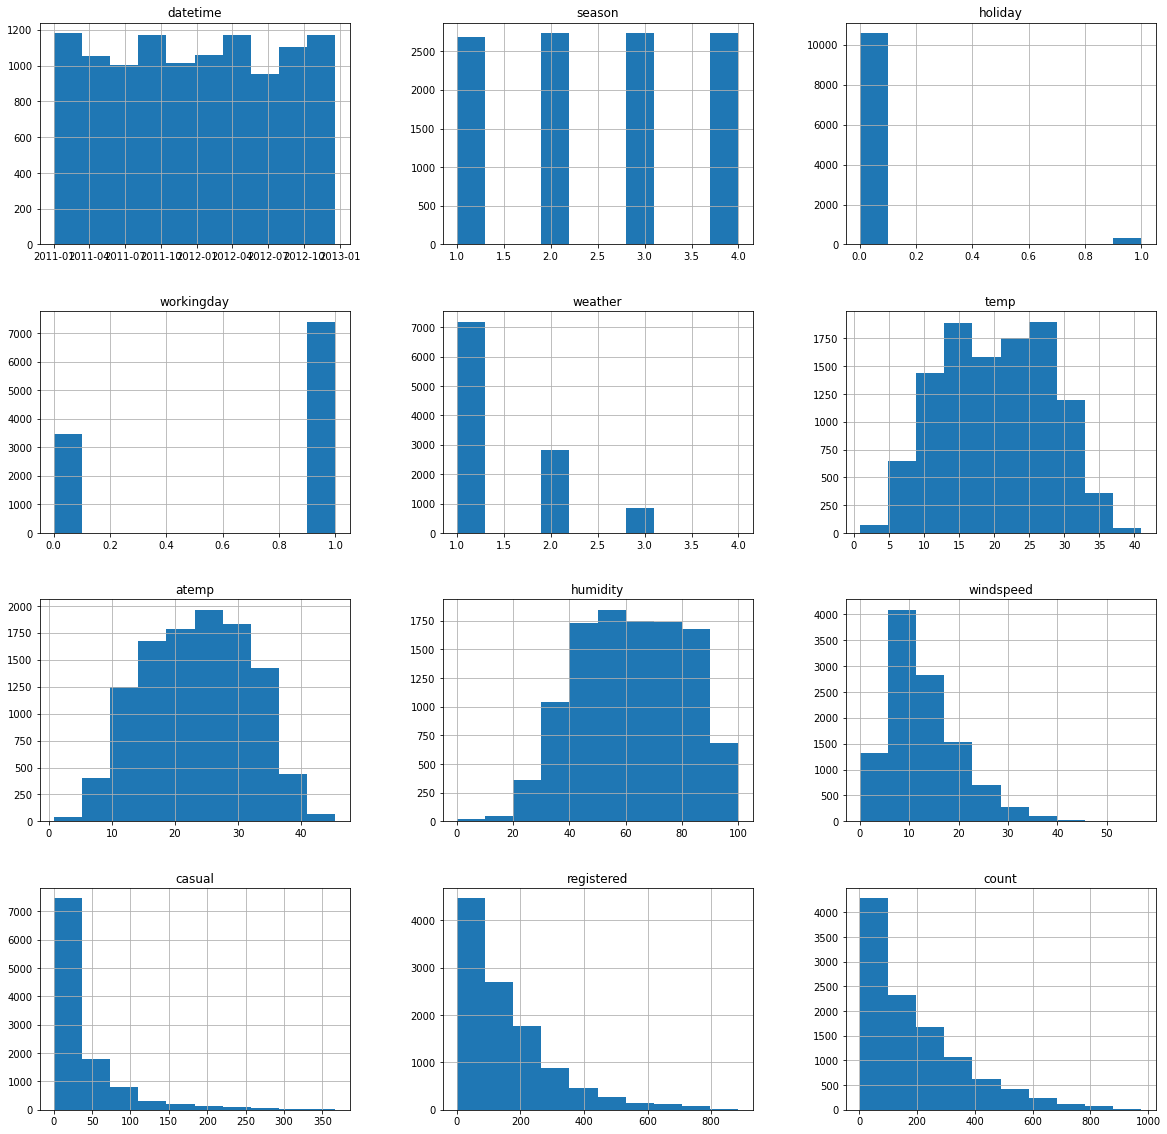

In [82]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,20));

In [77]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [78]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [79]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


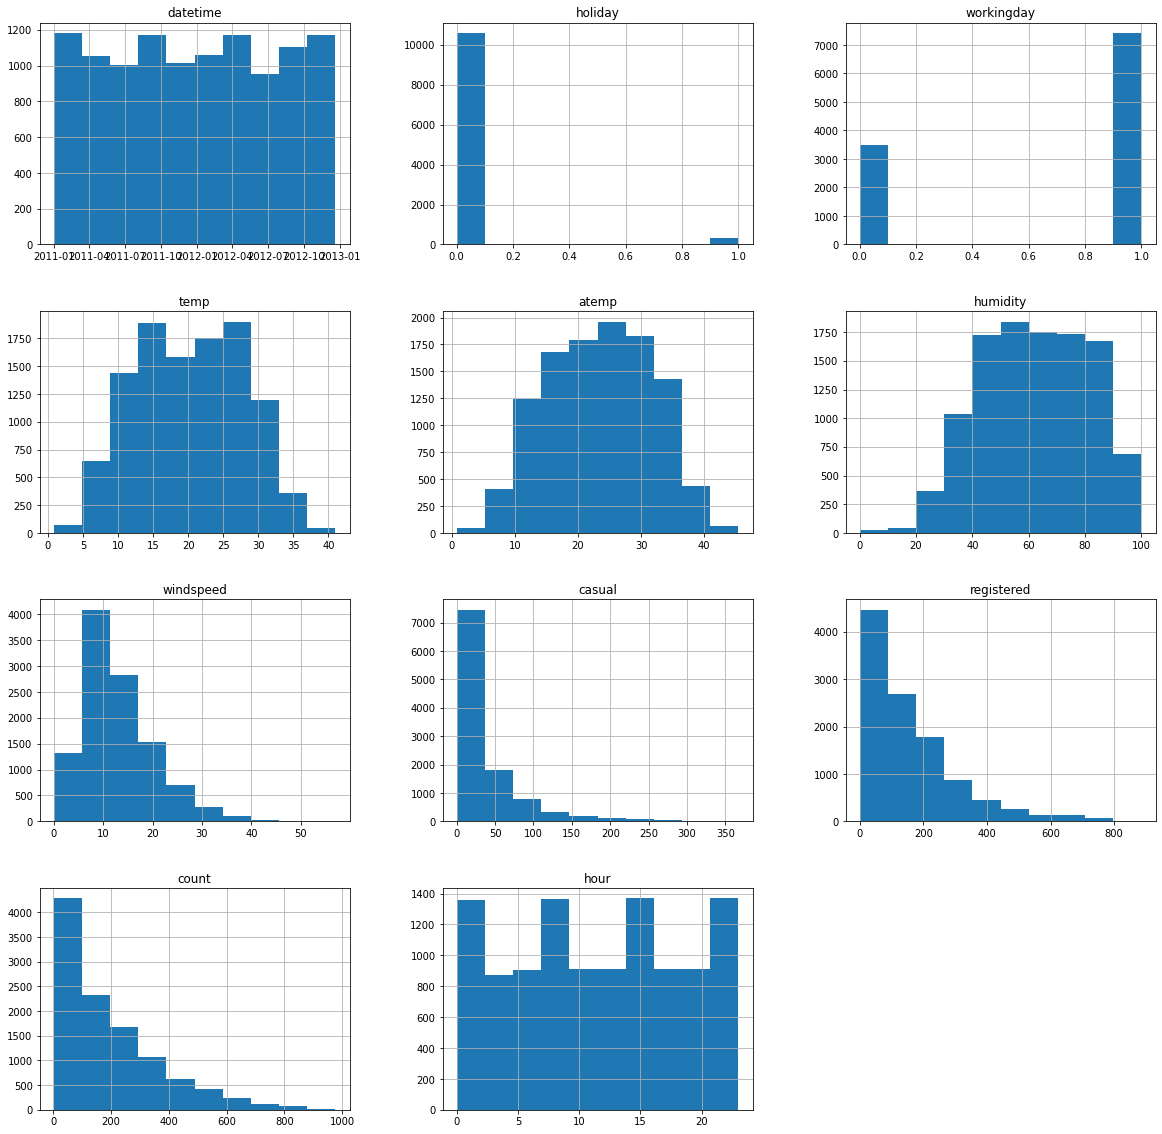

In [80]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20));

## Step 5: Rerun the model with the same settings as before, just with more features

In [59]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])],time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220722_173437/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220722_173437/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

In [60]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.082294      17.023822  563.623096                0.000692           0.323887            3       True         15
1          CatBoost_BAG_L2  -30.370049      14.937254  480.614562                0.130316          84.023137            2       True         13
2          LightGBM_BAG_L2  -30.467783      15.146279  419.025928                0.339340          22.434503            2       True         11
3        LightGBMXT_BAG_L2  -30.984105      15.896330  423.907632                1.089392          27.316207            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.413540      15.446216  406.144268                0.639278           9.552843            2       True         14
5   RandomForestMSE_BAG_L2  -31.596315      15.464082  429.525362         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.082294      17.023822  563.623096   
 1          CatBoost_BAG_L2  -30.370049      14.937254  480.614562   
 2          LightGBM_BAG_L2  -30.467783      15.146279  419.025928   
 3        LightGBMXT_BAG_L2  -30.984105      15.896330  423.907632   
 4     ExtraTreesMSE_BAG_L2  -31.413540      15.446216  406.144268   
 5   RandomForestMSE_BAG_L2  -31.596315      15.464082  429.525362   
 6      WeightedEnsemble_L2  -32.161886      13.713658  350.971930   
 7          LightGBM_BAG_L1  -33.919639       2.896118   38.180432   
 8          CatBoost_BAG_L1  -33.941431       0.213038  211.166142   
 9        LightGBMXT_BAG_L1  -34.457274       9.911262   87.280991   
 10    ExtraTreesMSE_BAG_L1  -38.323016       0.570955    6.045551   
 11  RandomForestMSE_BAG_L1  -38.445932       0.588023   13.467815   
 12  NeuralNetFastAI_BAG_L1  -83.907749       0.418997   40.387571   
 13  

In [61]:
# Remember to set all negative values to zero
new_predictor=predictor_new_features.predict(test)
new_predictor[new_predictor < 0] = 0

In [62]:
submission_new_features = pd.read_csv("/content/sampleSubmission.csv", parse_dates=['datetime'])


In [63]:
# Same submitting predictions
submission_new_features["count"] = new_predictor
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:03<00:00, 52.9kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-07-22 03:42:54  new features                       complete  1.97554      1.97554       
submission_new_hpo.csv       2022-07-21 03:31:37  new features with hyperparameters  complete  0.47708      0.47708       
submission.csv               2022-07-21 01:47:42  first raw submission               complete  1.84672      1.84672       
submission (2).csv           2022-07-17 02:50:39  My first submission                complete  1.84700      1.84700       


#### New Score of `1.97554`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [64]:
#(reference)https://github.com/awslabs/autogluon/blob/master/docs/tutorials/tabular_prediction/tabular-indepth.md

import autogluon.core as ag

nn_options = { 
    'num_epochs': 10, 
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), 
}

gbm_options = { 
    'num_boost_round': 100,  
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
}

hyperparameters = { 
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  } 


num_trials = 5  
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [65]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])],time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

No path specified. Models will be saved in: "AutogluonModels/ag-20220722_174546/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220722_174546/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L1/T1 ...
	-39.5016	 = Validation score   (-root_mean_squared_error)
	0.37s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-37.4217	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-36.9309	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-118.3072	 = Validation score   (-root_mean_squared_error)
	0.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T5 ...
	-41.8771	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 22.49s of the 597.41s of remaining time.
NaN or Inf found in input tensor.
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-74.363	 = Validation score   (-

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L2/T1 ...
	-39.6994	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.3803	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-39.5773	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-102.3367	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T5 ...
	-40.1093	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 17.7s of the 311.32s of remaining time.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
Fitted mod

In [66]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -36.401751       2.830111  341.091407                0.000920           0.382725            3       True         18
1         LightGBM_BAG_L2/T3  -36.715581       2.311093  277.414937                0.179967          15.817831            2       True         13
2         LightGBM_BAG_L2/T2  -36.781077       2.269531  277.468818                0.138405          15.871711            2       True         12
3         LightGBM_BAG_L2/T1  -36.853504       2.306470  276.903805                0.175344          15.306698            2       True         11
4         LightGBM_BAG_L2/T5  -37.378780       2.279713  276.999904                0.148587          15.402797            2       True         15
5        WeightedEnsemble_L2  -38.064472       0.362377   29.1

{'leaderboard':                        model   score_val  pred_time_val    fit_time  \
 0        WeightedEnsemble_L3  -36.401751       2.830111  341.091407   
 1         LightGBM_BAG_L2/T3  -36.715581       2.311093  277.414937   
 2         LightGBM_BAG_L2/T2  -36.781077       2.269531  277.468818   
 3         LightGBM_BAG_L2/T1  -36.853504       2.306470  276.903805   
 4         LightGBM_BAG_L2/T5  -37.378780       2.279713  276.999904   
 5        WeightedEnsemble_L2  -38.064472       0.362377   29.149750   
 6         LightGBM_BAG_L1/T3  -38.381741       0.208249   14.721866   
 7         LightGBM_BAG_L1/T2  -39.177026       0.153447   13.937491   
 8   NeuralNetTorch_BAG_L2/T2  -39.219876       2.510819  309.019140   
 9         LightGBM_BAG_L1/T1  -40.251237       0.145563   14.020248   
 10  NeuralNetTorch_BAG_L2/T1  -42.544090       2.478398  309.623442   
 11        LightGBM_BAG_L1/T5  -43.181784       0.166751   14.620322   
 12  NeuralNetTorch_BAG_L1/T1  -68.915691       0

In [67]:
# Remember to set all negative values to zero
new_predictor_hpo=predictor_new_hpo.predict(test)
new_predictor_hpo[new_predictor_hpo < 0] = 0

In [68]:
submission_new_hpo = pd.read_csv("/content/sampleSubmission.csv", parse_dates=['datetime'])


In [69]:
# Same submitting predictions
submission_new_hpo["count"] = new_predictor_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.47708`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

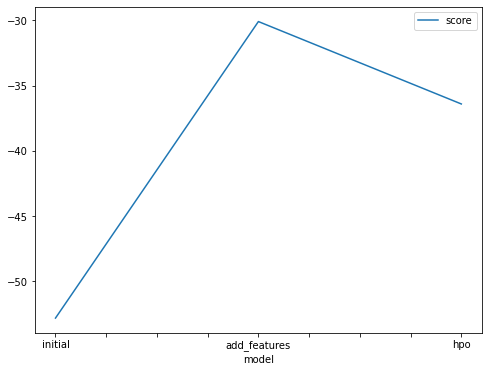

In [76]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
         "score": [predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

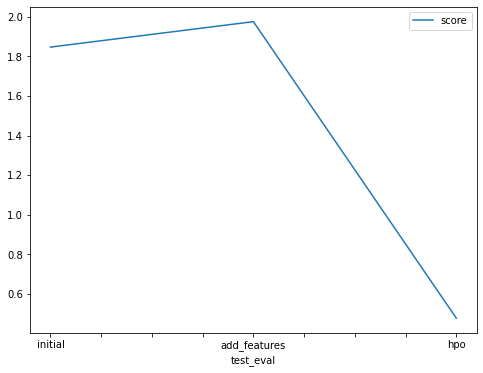

In [71]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84700, 1.97554, 0.47708]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [1.84700, 1.97554, 0.47708],
    "hpo2": [1.84700, 1.97554, 0.47708,
    "hpo3": [1.84700, 1.97554, 0.47708],
    "score": [1.84700, 1.97554, 0.47708]
})

In [89]:
!echo "KAGGLE_USERNAME=yourkaggleusername" >> .env
!echo "KAGGLE_KEY=yourkagglekey" >> .env

In [87]:
!pip install python-dotenv
from dotenv import dotenv_values
CONFIG = dotenv_values('.env')
kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
